# digits con clasificadores discriminativos

Al igual que en iris, sklearn facilita el aprendizaje y evaluación de clasificadores discriminativos en digits.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

Lectura del corpus digits:

In [52]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, shuffle=True, random_state=23)
# print(digits.DESCR)
# print(digits.feature_names)

Veamos Perceptrón con penalización L2 en función de alpha:

In [53]:
for a in np.logspace(-8,-3,6):
    clf = Perceptron(penalty='l2', alpha=a, random_state=0).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de Perceptron(alpha=1e-08, penalty='l2') es 93.0%
La precisión de Perceptron(alpha=1e-07, penalty='l2') es 93.5%
La precisión de Perceptron(alpha=1e-06, penalty='l2') es 86.9%
La precisión de Perceptron(alpha=1e-05, penalty='l2') es 85.9%
La precisión de Perceptron(penalty='l2') es 92.8%
La precisión de Perceptron(alpha=0.001, penalty='l2') es 87.2%


In [54]:
for a in np.logspace(-8,-3,6):
    clf = Perceptron(penalty='elasticnet', l1_ratio=0.608, alpha=a, random_state=0).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de Perceptron(alpha=1e-08, l1_ratio=0.608, penalty='elasticnet') es 93.0%
La precisión de Perceptron(alpha=1e-07, l1_ratio=0.608, penalty='elasticnet') es 93.0%
La precisión de Perceptron(alpha=1e-06, l1_ratio=0.608, penalty='elasticnet') es 94.1%
La precisión de Perceptron(alpha=1e-05, l1_ratio=0.608, penalty='elasticnet') es 95.9%
La precisión de Perceptron(l1_ratio=0.608, penalty='elasticnet') es 93.7%
La precisión de Perceptron(alpha=0.001, l1_ratio=0.608, penalty='elasticnet') es 84.8%


Veamos regresión logística con varios solvers (y max_iter=10000).

In [55]:
for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    clf = LogisticRegression(solver=solver, max_iter=10000).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))

La precisión de LogisticRegression(max_iter=10000) es 95.9%
La precisión de LogisticRegression(max_iter=10000, solver='liblinear') es 94.1%
La precisión de LogisticRegression(max_iter=10000, solver='newton-cg') es 95.9%
La precisión de LogisticRegression(max_iter=10000, solver='sag') es 96.3%
La precisión de LogisticRegression(max_iter=10000, solver='saga') es 96.3%


**Ejercicio:** Aparte de características polinómicas, el preproceso de características puede incluir estandarización (StandardScaler) y reducción de la dimensión (PCA). Trata de mejorar la precisión de regresión logística mediante pipelines con
**ingeniería de características**.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

El dataset tiene originalmente 64 características


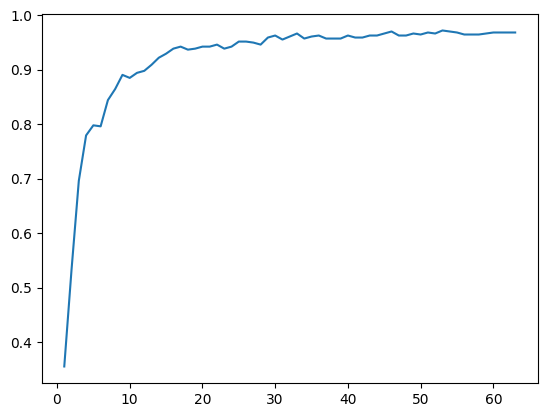

In [57]:
n = len(digits.feature_names)
print(f'\033[92mEl dataset tiene originalmente {n} características\033[0m')
# print(f'X_train: {X_train.shape}, y_train: {y_train}')
acc_array = []
for c in range(1,n):
    clf = make_pipeline(
            StandardScaler(), 
            PCA(n_components=c), 
            LogisticRegression(max_iter=10000)
        )
    
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    # print('La precisión de {0!s} es {1:.1%}'.format(clf, acc))
    acc_array.append(acc)

x_val = np.arange(1,n)
plt.plot(x_val, acc_array)